In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [3]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [5]:
q3 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q3,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [6]:
q4 = "select * from facts where population = 0"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [7]:
q5 = "select * from facts where population == (select max(population) from facts)"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [8]:
#Antarctica has zero and the world has the total population

In [9]:
q6 = "select population, population_growth, birth_rate, death_rate from facts where population > (select min(population) from facts) and population < (select max(population) from facts)"
population_data = pd.read_sql_query(q6, conn)
print(population_data)

     population  population_growth  birth_rate  death_rate
0      32564342               2.32       38.57       13.89
1       3029278               0.30       12.92        6.58
2      39542166               1.84       23.67        4.31
3         85580               0.12        8.13        6.96
4      19625353               2.78       38.78       11.49
5         92436               1.24       15.85        5.69
6      43431886               0.93       16.64        7.33
7       3056382               0.15       13.61        9.34
8      22751014               1.07       12.15        7.14
9       8665550               0.55        9.41        9.42
10      9780780               0.96       16.64        7.07
11       324597               0.85       15.50        7.05
12      1346613               2.41       13.66        2.69
13    168957745               1.60       21.14        5.61
14       290604               0.31       11.87        8.44
15      9589689               0.20       10.70       13.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11fb682b70>,
      dtype=object)

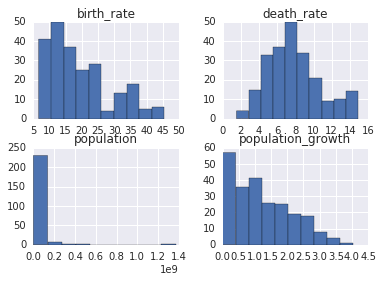

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

population_data.hist()

In [11]:
q7 = "select name, population / area_land as population_density from facts order by population_density desc"
pop_density = pd.read_sql_query(q7, conn)
print(pop_density.head(20))

            name  population_density
0          Macau             21168.0
1         Monaco             15267.0
2      Singapore              8259.0
3      Hong Kong              6655.0
4     Gaza Strip              5191.0
5      Gibraltar              4876.0
6        Bahrain              1771.0
7       Maldives              1319.0
8          Malta              1310.0
9        Bermuda              1299.0
10    Bangladesh              1297.0
11  Sint Maarten              1167.0
12      Guernsey               847.0
13        Jersey               838.0
14        Taiwan               725.0
15      Barbados               675.0
16     Mauritius               660.0
17         Aruba               623.0
18       Lebanon               604.0
19  Saint Martin               588.0


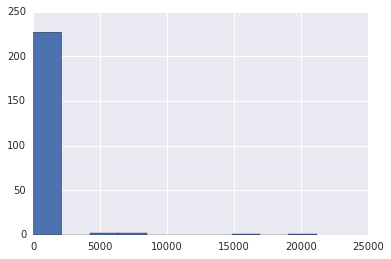

In [12]:
pop_density['population_density'].hist()

In [14]:
q8 = "select name, area_water / area_land wet_ratio from facts where wet_ratio > 0.5 order by wet_ratio desc"
pd.read_sql_query(q8, conn)

,name,wet_ratio
0,British Indian Ocean Territory,905
1,Virgin Islands,4
